In [215]:
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage import draw
from skimage import io
from skimage.util import crop

In [67]:
random.seed(42)

In [196]:
img = io.imread('../../ACE/ImageNet/ILSVRC2012_img_train/n01531178/n01531178_278.JPEG')

io.imsave('../images/reference_image.jpg',img)

In [207]:

height, width, _ = img.shape
R = 100 # Radius
previous_heights = []
previous_widths = []

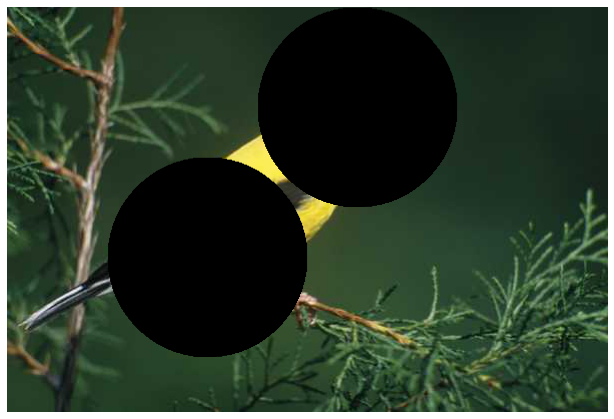

In [253]:
mask1 = draw.circle(100, 350, R)
mask2 = draw.circle(250, 200, R)

fig, ax = plt.subplots(figsize=((width/dpi),(height/dpi)), dpi=dpi)
ax.imshow(img)
ax.plot(mask1[1], mask1[0], 'black', lw=1)
ax.plot(mask2[1], mask2[0], 'black', lw=1)
ax.axis('off')

plt.tight_layout(pad=-0.001)
plt.savefig(f'../images/test_mask_custom.jpg')

plt.show()

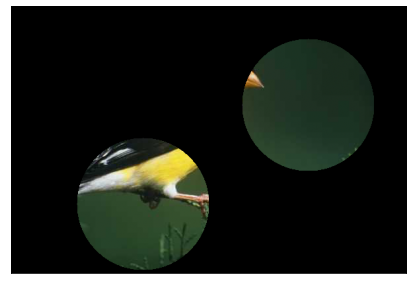

In [209]:
# Input image
image = io.imread('../../ACE/ImageNet/ILSVRC2012_img_train/n01531178/n01531178_278.JPEG') / 255.

background_height, background_width, background_depth = image.shape
background = np.zeros((background_height, background_width, background_depth))

R = 100

xcoords = [100, 350]
ycoords = [200, 50]

def plot_image_features(x, y, R, background):
    pass

for x, y in zip(xcoords, ycoords):

    cropped_image = crop(image, ((y,(background_height - y - 2*R)),(x,(background_width - x - 2*R)),(0,0)))    
    cropped_image_height, cropped_image_width, cropped_image_depth = cropped_image.shape

    # Produce circular image feature only
    X, Y = np.ogrid[:cropped_image_width, :cropped_image_height]
    outer_disk_mask = (X - cropped_image_width / 2)**2 + (Y - cropped_image_height / 2)**2 > (cropped_image_width / 2)**2
    cropped_image[outer_disk_mask] = 0

    background[y : y + cropped_image_height, x : x + cropped_image_width, :] = cropped_image
    background = background[:,:,:3] * (1. - background) + background[:,:,:3] * background

fig, ax = plt.subplots()
ax.imshow(background)
fig.tight_layout(pad=0.01)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, background.shape[1], background.shape[0], 0])
plt.savefig(f'../images/test_combined_features.jpg')
plt.show()


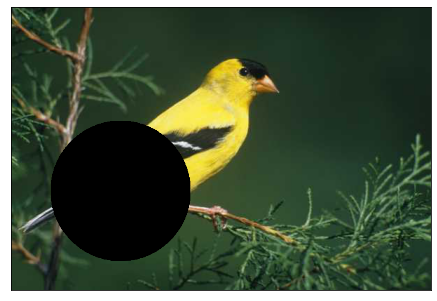

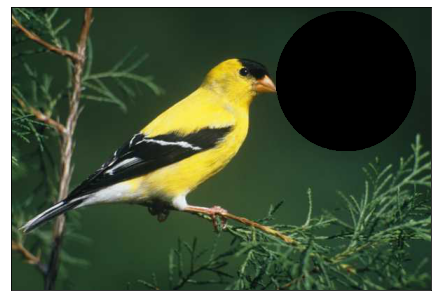

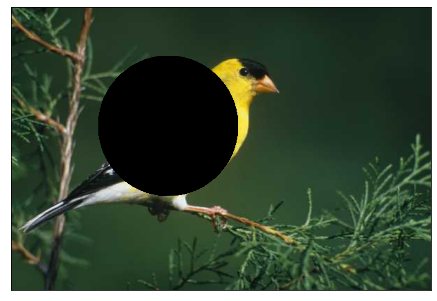

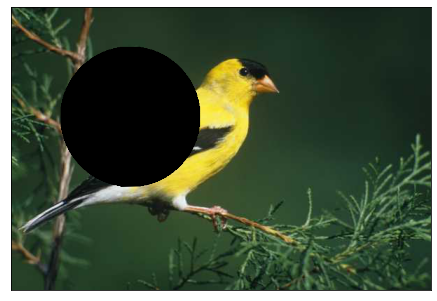

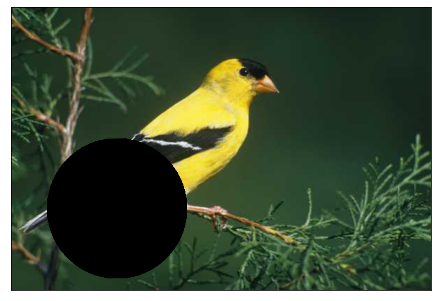

In [32]:
def get_mask_coords():
    
    mask_height = random.randint(R,height-R)
    mask_width = random.randint(R,width-R)

    if mask_height in previous_heights or mask_width in previous_widths:
        get_mask_coords()
    else:
        previous_heights.append(previous_heights)
        previous_widths.append(mask_width)
        return mask_height, mask_width

for i in range(1000):
    try:
        mask_height, mask_width = get_mask_coords()
    except TypeError:
        break

    mask = draw.circle(mask_height, mask_width, R)

    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.plot(mask[1], mask[0], 'black', lw=1)
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis([0, img.shape[1], img.shape[0], 0])

    fig.tight_layout(pad=0.05)
    plt.savefig(f'../images/test_mask_{i}.jpg')
    plt.show()